In [44]:
# Because we discussed predicting circles I wanted to try it...
# also works good :) exciting... ._.

In [ ]:
import os
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from hough import *
from conformalMap import *
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

%matplotlib inline

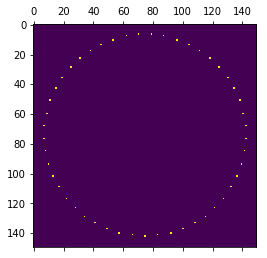

[0.89848499407624]


In [99]:
import random
import math
train_X = []
train_Y = []
dims = 150
k = dims // 2
N = 200
for i in range(N):
    r = random.uniform(0, 1)
    train_Y.append([r])
    image = np.zeros((dims, dims))
    for theta in np.linspace(0, 2 * math.pi):
        x = (r * math.cos(theta) * k + k)
        y = (r * math.sin(theta) * k + k)
#        print(x, y)
        image[int(x), int(y)] = 1
    train_X.append(image)

plt.matshow(train_X[6])
plt.show()
print(train_Y[6])
train_X = np.reshape(train_X, (N, dims, dims, 1))
train_Y = np.reshape(train_Y, (N, 1))

In [100]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation="relu", input_shape=(dims, dims, 1)),
    layers.Conv2D(8, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(1)
  ])

  #optimizer = keras.optimizers.RMSprop(learning_rate=0.00001) #0.00001 works good
  model.compile(loss='mse', optimizer='adam')
  return model

In [101]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 8)       80        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 146, 146, 8)       584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 16)        1168      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 69, 69, 16)        2320      
_________________________________________________________________
flatten_6 (Flatten)          (None, 76176)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 76177     
Total para

In [102]:
EPOCHS = 1
print(train_X.shape)
print(train_Y.shape)
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=EPOCHS)

(200, 150, 150, 1)
(200, 1)
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 3s 15ms/step - loss: 0.1848 - val_loss: 0.0612


In [106]:
r = random.uniform(0, 1)
image = np.zeros((dims, dims))
for theta in np.linspace(0, 2 * math.pi):
    x = (r * math.cos(theta) * k + k)
    y = (r * math.sin(theta) * k + k)
    image[int(x), int(y)] = 1
    
predicted_params = model.predict(np.array([np.reshape(image, (dims, dims, 1))]))
print(predicted_params)

[[0.44848955]]


## real circle

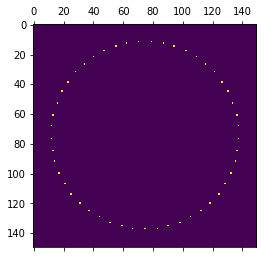

In [107]:
plt.matshow(image)
plt.show()

## predicted circle

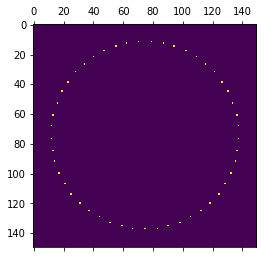

In [108]:
predicted_image = np.zeros((dims, dims))
for theta in np.linspace(0, 2 * math.pi):
    x = (r * math.cos(theta) * k + k)
    y = (r * math.sin(theta) * k + k)
    predicted_image[int(x), int(y)] = 1
plt.matshow(predicted_image)
plt.show()